In [1]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import neural_network
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from PIL import Image

Iteration 1, loss = 1.90572557
Iteration 2, loss = 0.50931891
Iteration 3, loss = 0.30260782
Iteration 4, loss = 0.24720288
Iteration 5, loss = 0.32598218
Iteration 6, loss = 0.20700745
Iteration 7, loss = 0.16135782
Iteration 8, loss = 0.13463886
Iteration 9, loss = 0.11885473
Iteration 10, loss = 0.09088963
Iteration 11, loss = 0.08285059
Iteration 12, loss = 0.07094968
Iteration 13, loss = 0.05504954
Iteration 14, loss = 0.05229632
Iteration 15, loss = 0.04847813
Iteration 16, loss = 0.04088091
Iteration 17, loss = 0.03128416
Iteration 18, loss = 0.02842438
Iteration 19, loss = 0.02453571
Iteration 20, loss = 0.02204756
Iteration 21, loss = 0.01971930
Iteration 22, loss = 0.01770570
Iteration 23, loss = 0.01718336
Iteration 24, loss = 0.01488329
Iteration 25, loss = 0.01273771
Iteration 26, loss = 0.01273532
Iteration 27, loss = 0.01234144
Iteration 28, loss = 0.01576477
Iteration 29, loss = 0.00940303
Iteration 30, loss = 0.00909500
Iteration 31, loss = 0.00785258
Iteration 32, los

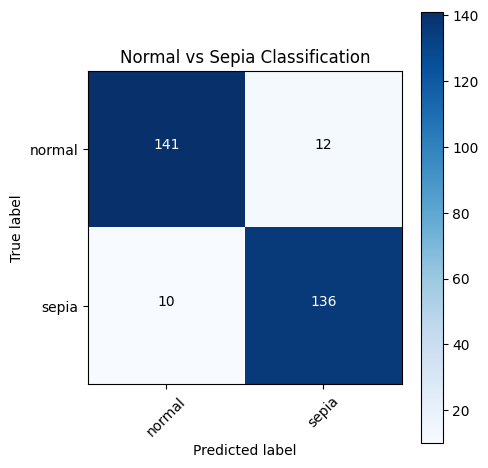

Accuracy: 0.9264214046822743
Precision: 0.918918918918919
Recall: 0.9315068493150684


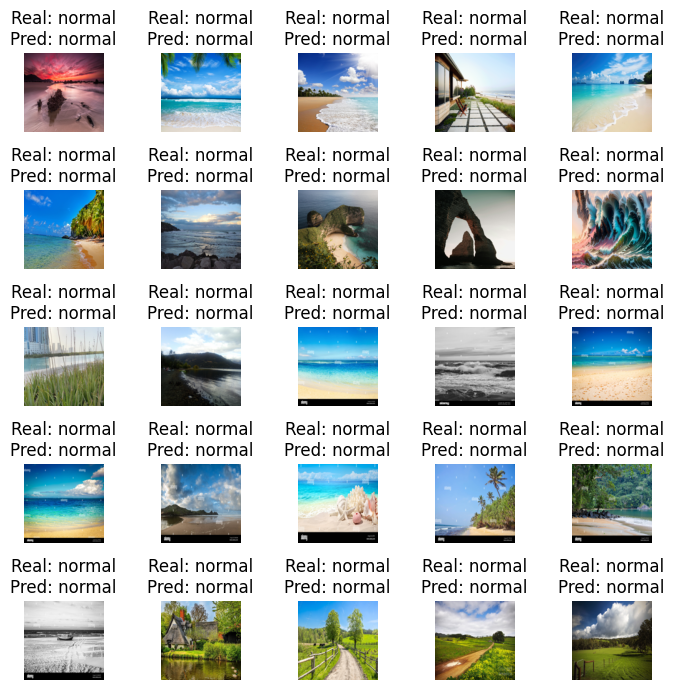

In [5]:
# 1. Load the images (sepia and normal)

def loadImageData(base_path, categories, target_size=(128,128)):
    
    #store in inputs the image data features and in outputs the labes(0-n,1-s)
    inputs=[]    
    outputs=[]   
    output_names=['normal', 'sepia']
    
    #first load the normal images by resizing them and keeping the colors into 1D array
    for category in categories:
        normal_folder = os.path.join(base_path,'Normal_ImageData',category)
        for img_name in os.listdir(normal_folder):
            img_path = os.path.join(normal_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(0)
            
            
    for category in categories:
        sepia_folder = os.path.join(base_path, 'Sepia_ImageData', category)
        for img_name in os.listdir(sepia_folder):
            img_path = os.path.join(sepia_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(1)
    
    return np.array(inputs), np.array(outputs), output_names


#2 define the categories and path to the dataset
categories = ['Beaches', 'Countryside', 'Deserts', 'Fields', 'Forests', 'Lakes', 'Mountains', 'Sunset', 'Urban']
base_path = 'C:/Users/LENOVO/PycharmProjects/AI/LAB7/DataBase'
inputs, outputs, output_names = loadImageData(base_path, categories)


#3 split data into train and test sets
def splitData(inputs,outputs):
    np.random.seed(5)
    
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]
    
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return np.array(trainInputs), np.array(trainOutputs), np.array(testInputs), np.array(testOutputs)

trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
#4 normalization of the data
def normalisation(trainData, testData):
    scaler = StandardScaler()
    scaler.fit(trainData)                                      # fit only on training data computing the mean and standard deviation
    normalisedTrainData = scaler.transform(trainData)          #apply on this data to avoid data leakage, it sclaes it to zile mean
    normalisedTestData = scaler.transform(testData)
    return normalisedTrainData, normalisedTestData

trainInputsNormalised, testInputsNormalised = normalisation(trainInputs, testInputs)

#5 Train the ANN model
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(15,) , activation='relu', max_iter=100, solver='sgd',verbose=2,random_state=1,learning_rate_init =0.1)
classifier.fit(trainInputsNormalised, trainOutputs)

#6 test the model and evaluate performane by making predictions on test set
predictedLabels = classifier.predict(testInputsNormalised)

def evalMultiClass(true_labels, predicted_labels, output_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    acc = accuracy_score(true_labels, predicted_labels)
    prec, recall, _, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
    return acc, prec, recall, cm

#7 plot the confusion matrix
def plotConfusionMatrix(cm, output_names, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(output_names))
    plt.xticks(tick_marks, output_names, rotation=45)
    plt.yticks(tick_marks, output_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

#8 compute and display evaluation metrics
acc, prec, recall, cm = evalMultiClass(testOutputs, predictedLabels, output_names)
plotConfusionMatrix(cm, output_names, "Normal vs Sepia Classification")
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)


# 9 visualize some test images with their predictions
n, m = 5, 5  
fig, axes = plt.subplots(n, m, figsize=(7, 7))
fig.tight_layout()
for i in range(n):
    for j in range(m):
        idx = m * i + j
        if idx < len(testInputs):
            # reshape the flattened array back to 128x128x3
            img = testInputs[idx].reshape(128, 128, 3)
            # ensure pixel values are in the correct range (0-255) and type for display
            img = np.clip(img, 0, 255).astype(np.uint8)
            axes[i][j].imshow(img)  # display the image with true colors
            font = 'normal' if testOutputs[idx] == predictedLabels[idx] else 'bold'
            axes[i][j].set_title(f'Real: {output_names[testOutputs[idx]]}\nPred: {output_names[predictedLabels[idx]]}', fontweight=font)
            axes[i][j].set_axis_off()
plt.show()

Testing the influence of hyperparameters on the ANN's performance

Iteration 1, loss = 1.90572557
Iteration 2, loss = 0.50931891
Iteration 3, loss = 0.30260782
Iteration 4, loss = 0.24720288
Iteration 5, loss = 0.32598218
Iteration 6, loss = 0.20700745
Iteration 7, loss = 0.16135782
Iteration 8, loss = 0.13463886
Iteration 9, loss = 0.11885473
Iteration 10, loss = 0.09088963
Iteration 11, loss = 0.08285059
Iteration 12, loss = 0.07094968
Iteration 13, loss = 0.05504954
Iteration 14, loss = 0.05229632
Iteration 15, loss = 0.04847813
Iteration 16, loss = 0.04088091
Iteration 17, loss = 0.03128416
Iteration 18, loss = 0.02842438
Iteration 19, loss = 0.02453571
Iteration 20, loss = 0.02204756
Iteration 21, loss = 0.01971930
Iteration 22, loss = 0.01770570
Iteration 23, loss = 0.01718336
Iteration 24, loss = 0.01488329
Iteration 25, loss = 0.01273771
Iteration 26, loss = 0.01273532
Iteration 27, loss = 0.01234144
Iteration 28, loss = 0.01576477
Iteration 29, loss = 0.00940303
Iteration 30, loss = 0.00909500
Iteration 31, loss = 0.00785258
Iteration 32, los

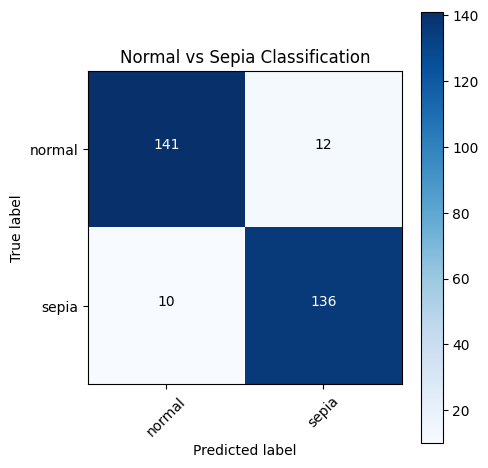

Accuracy: 0.9264214046822743
Precision: 0.918918918918919
Recall: 0.9315068493150684


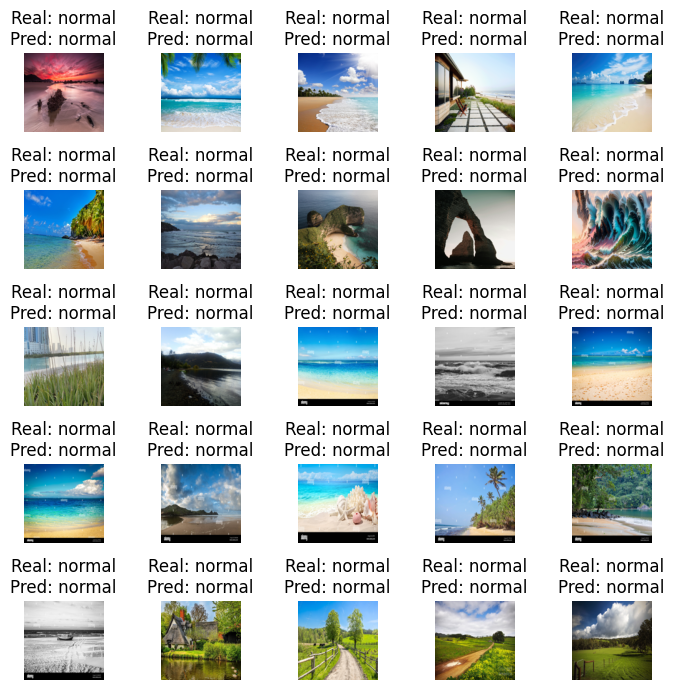

In [11]:
# 1. Load the images (sepia and normal)

def loadImageData(base_path, categories, target_size=(128,128)):
    
    #store in inputs the image data features and in outputs the labes(0-n,1-s)
    inputs=[]    
    outputs=[]   
    output_names=['normal', 'sepia']
    
    #first load the normal images by resizing them and keeping the colors into 1D array
    for category in categories:
        normal_folder = os.path.join(base_path,'Normal_ImageData',category)
        for img_name in os.listdir(normal_folder):
            img_path = os.path.join(normal_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(0)
            
            
    for category in categories:
        sepia_folder = os.path.join(base_path, 'Sepia_ImageData', category)
        for img_name in os.listdir(sepia_folder):
            img_path = os.path.join(sepia_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)A
            outputs.append(1)
    
    return np.array(inputs), np.array(outputs), output_names


#2 define the categories and path to the dataset
categories = ['Beaches', 'Countryside', 'Deserts', 'Fields', 'Forests', 'Lakes', 'Mountains', 'Sunset', 'Urban']
base_path = 'C:/Users/LENOVO/PycharmProjects/AI/LAB7/DataBase'
inputs, outputs, output_names = loadImageData(base_path, categories)


#3 split data into train and test sets
def splitData(inputs,outputs):
    np.random.seed(5)
    
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]
    
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return np.array(trainInputs), np.array(trainOutputs), np.array(testInputs), np.array(testOutputs)

trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
#4 normalization of the data
def normalisation(trainData, testData):
    scaler = StandardScaler()
    scaler.fit(trainData)                                      # fit only on training data computing the mean and standard deviation
    normalisedTrainData = scaler.transform(trainData)          #apply on this data to avoid data leakage, it sclaes it to zile mean
    normalisedTestData = scaler.transform(testData)
    return normalisedTrainData, normalisedTestData

trainInputsNormalised, testInputsNormalised = normalisation(trainInputs, testInputs)

#5 Train the ANN model
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(30,) , activation='relu', max_iter=100, solver='sgd',verbose=2,random_state=1,learning_rate_init =0.01)
classifier.fit(trainInputsNormalised, trainOutputs)

#6 test the model and evaluate performane by making predictions on test set
predictedLabels = classifier.predict(testInputsNormalised)

def evalMultiClass(true_labels, predicted_labels, output_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    acc = accuracy_score(true_labels, predicted_labels)
    prec, recall, _, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
    return acc, prec, recall, cm

#7 plot the confusion matrixA
def plotConfusionMatrix(cm, output_names, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(output_names))
    plt.xticks(tick_marks, output_names, rotation=45)
    plt.yticks(tick_marks, output_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

#8 compute and display evaluation metrics
acc, prec, recall, cm = evalMultiClass(testOutputs, predictedLabels, output_names)
plotConfusionMatrix(cm, output_names, "Normal vs Sepia Classification")
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)


# 9 visualize some test images with their predictions
n, m = 5, 5  
fig, axes = plt.subplots(n, m, figsize=(7, 7))
fig.tight_layout()
for i in range(n):
    for j in range(m):
        idx = m * i + j
        if idx < len(testInputs):
            # reshape the flattened array back to 128x128x3
            img = testInputs[idx].reshape(128, 128, 3)
            # ensure pixel values are in the correct range (0-255) and type for display
            img = np.clip(img, 0, 255).astype(np.uint8)
            axes[i][j].imshow(img)  # display the image with true colors
            font = 'normal' if testOutputs[idx] == predictedLabels[idx] else 'bold'
            axes[i][j].set_title(f'Real: {output_names[testOutputs[idx]]}\nPred: {output_names[predictedLabels[idx]]}', fontweight=font)
            axes[i][j].set_axis_off()

plt.show()

Iteration 1, loss = 5.88318761
Iteration 2, loss = 3.69460876
Iteration 3, loss = 2.58303716
Iteration 4, loss = 2.34939300
Iteration 5, loss = 1.45704102
Iteration 6, loss = 1.00849579
Iteration 7, loss = 1.04768588
Iteration 8, loss = 0.69276245
Iteration 9, loss = 0.37608490
Iteration 10, loss = 0.36164695
Iteration 11, loss = 0.38584249
Iteration 12, loss = 0.40486769
Iteration 13, loss = 0.27593389
Iteration 14, loss = 0.25599529
Iteration 15, loss = 0.34991639
Iteration 16, loss = 0.25087374
Iteration 17, loss = 0.12505731
Iteration 18, loss = 0.21537138
Iteration 19, loss = 0.09249728
Iteration 20, loss = 0.05916184
Iteration 21, loss = 0.04156851
Iteration 22, loss = 0.09230597
Iteration 23, loss = 0.16494867
Iteration 24, loss = 0.17885255
Iteration 25, loss = 0.12227162
Iteration 26, loss = 0.07373724
Iteration 27, loss = 0.08446756
Iteration 28, loss = 0.00901288
Iteration 29, loss = 0.09472530
Iteration 30, loss = 0.07293515
Iteration 31, loss = 0.13920099
Iteration 32, los

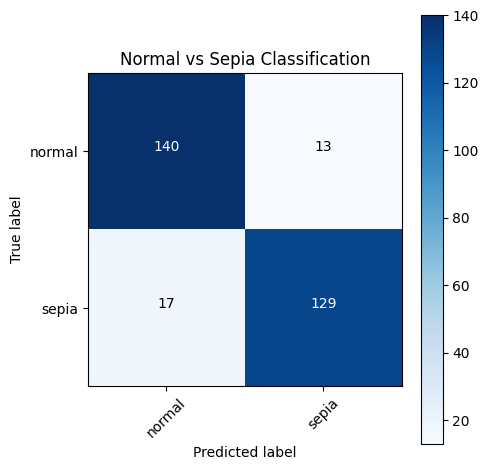

Accuracy: 0.8996655518394648
Precision: 0.9084507042253521
Recall: 0.8835616438356164


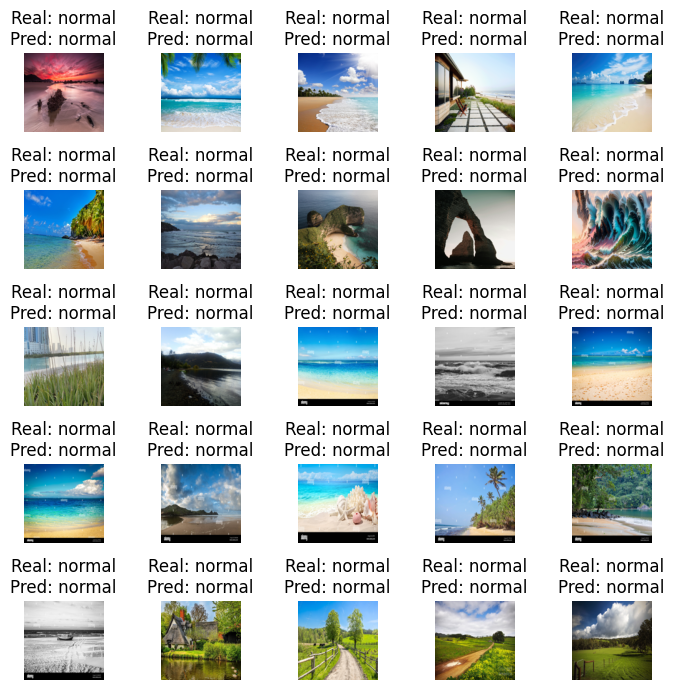

In [13]:
# 1. Load the images (sepia and normal)

def loadImageData(base_path, categories, target_size=(128,128)):
    
    #store in inputs the image data features and in outputs the labes(0-n,1-s)
    inputs=[]    
    outputs=[]   
    output_names=['normal', 'sepia']
    
    #first load the normal images by resizing them and keeping the colors into 1D array
    for category in categories:
        normal_folder = os.path.join(base_path,'Normal_ImageData',category)
        for img_name in os.listdir(normal_folder):
            img_path = os.path.join(normal_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(0)
            
            
    for category in categories:
        sepia_folder = os.path.join(base_path, 'Sepia_ImageData', category)
        for img_name in os.listdir(sepia_folder):
            img_path = os.path.join(sepia_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(1)
    
    return np.array(inputs), np.array(outputs), output_names


#2 define the categories and path to the dataset
categories = ['Beaches', 'Countryside', 'Deserts', 'Fields', 'Forests', 'Lakes', 'Mountains', 'Sunset', 'Urban']
base_path = 'C:/Users/LENOVO/PycharmProjects/AI/LAB7/DataBase'
inputs, outputs, output_names = loadImageData(base_path, categories)


#3 split data into train and test sets
def splitData(inputs,outputs):
    np.random.seed(5)
    
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]
    
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return np.array(trainInputs), np.array(trainOutputs), np.array(testInputs), np.array(testOutputs)

trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
#4 normalization of the data
def normalisation(trainData, testData):
    scaler = StandardScaler()
    scaler.fit(trainData)                                      # fit only on training data computing the mean and standard deviation
    normalisedTrainData = scaler.transform(trainData)          #apply on this data to avoid data leakage, it sclaes it to zile mean
    normalisedTestData = scaler.transform(testData)
    return normalisedTrainData, normalisedTestData

trainInputsNormalised, testInputsNormalised = normalisation(trainInputs, testInputs)

#5 Train the ANN model
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(30,) , activation='relu', max_iter=100, solver='adam',verbose=2,random_state=1,learning_rate_init =0.01)
classifier.fit(trainInputsNormalised, trainOutputs)

#6 test the model and evaluate performane by making predictions on test set
predictedLabels = classifier.predict(testInputsNormalised)

def evalMultiClass(true_labels, predicted_labels, output_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    acc = accuracy_score(true_labels, predicted_labels)
    prec, recall, _, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
    return acc, prec, recall, cm

#7 plot the confusion matrix
def plotConfusionMatrix(cm, output_names, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(output_names))
    plt.xticks(tick_marks, output_names, rotation=45)
    plt.yticks(tick_marks, output_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

#8 compute and display evaluation metrics
acc, prec, recall, cm = evalMultiClass(testOutputs, predictedLabels, output_names)
plotConfusionMatrix(cm, output_names, "Normal vs Sepia Classification")
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)


# 9 visualize some test images with their predictions
n, m = 5, 5  
fig, axes = plt.subplots(n, m, figsize=(7, 7))
fig.tight_layout()
for i in range(n):
    for j in range(m):
        idx = m * i + j
        if idx < len(testInputs):
            # reshape the flattened array back to 128x128x3
            img = testInputs[idx].reshape(128, 128, 3)
            # ensure pixel values are in the correct range (0-255) and type for display
            img = np.clip(img, 0, 255).astype(np.uint8)
            axes[i][j].imshow(img)  # display the image with true colors
            font = 'normal' if testOutputs[idx] == predictedLabels[idx] else 'bold'
            axes[i][j].set_title(f'Real: {output_names[testOutputs[idx]]}\nPred: {output_names[predictedLabels[idx]]}', fontweight=font)
            axes[i][j].set_axis_off()
plt.show()

More complex layering

Iteration 1, loss = 0.55378182
Iteration 2, loss = 0.30693662
Iteration 3, loss = 0.22662282
Iteration 4, loss = 0.17886008
Iteration 5, loss = 0.14561636
Iteration 6, loss = 0.12088340
Iteration 7, loss = 0.10190392
Iteration 8, loss = 0.08790177
Iteration 9, loss = 0.07873672
Iteration 10, loss = 0.07055078
Iteration 11, loss = 0.06315708
Iteration 12, loss = 0.05852694
Iteration 13, loss = 0.05366611
Iteration 14, loss = 0.04790840
Iteration 15, loss = 0.04435939
Iteration 16, loss = 0.04131940
Iteration 17, loss = 0.03912527
Iteration 18, loss = 0.03691344
Iteration 19, loss = 0.03504665
Iteration 20, loss = 0.03298323
Iteration 21, loss = 0.03032817
Iteration 22, loss = 0.02881157
Iteration 23, loss = 0.02761957
Iteration 24, loss = 0.02650502
Iteration 25, loss = 0.02486444
Iteration 26, loss = 0.02394977
Iteration 27, loss = 0.02330267
Iteration 28, loss = 0.02263137
Iteration 29, loss = 0.02158773
Iteration 30, loss = 0.02085433
Iteration 31, loss = 0.01995736
Iteration 32, los

C:\Users\LENOVO\PycharmProjects\AI\LAB7\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


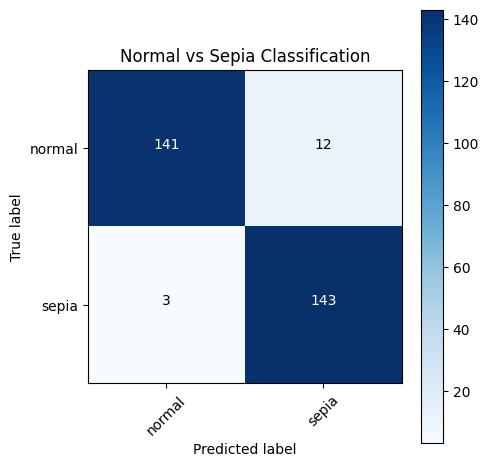

Accuracy: 0.9498327759197325
Precision: 0.9225806451612903
Recall: 0.9794520547945206


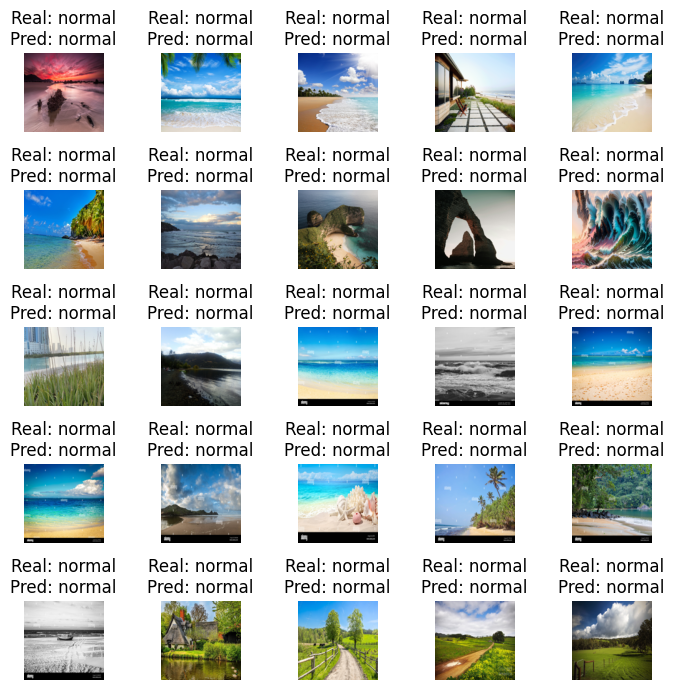

In [8]:
# 1. Load the images (sepia and normal)

def loadImageData(base_path, categories, target_size=(128,128)):
    
    #store in inputs the image data features and in outputs the labes(0-n,1-s)
    inputs=[]    
    outputs=[]   
    output_names=['normal', 'sepia']
    
    #first load the normal images by resizing them and keeping the colors into 1D array
    for category in categories:
        normal_folder = os.path.join(base_path,'Normal_ImageData',category)
        for img_name in os.listdir(normal_folder):
            img_path = os.path.join(normal_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(0)
            
            
    for category in categories:
        sepia_folder = os.path.join(base_path, 'Sepia_ImageData', category)
        for img_name in os.listdir(sepia_folder):
            img_path = os.path.join(sepia_folder, img_name)
            img = Image.open(img_path).resize(target_size)
            img = img.convert('RGB')
            img_array = np.array(img).flatten()
            inputs.append(img_array)
            outputs.append(1)
    
    return np.array(inputs), np.array(outputs), output_names


#2 define the categories and path to the dataset
categories = ['Beaches', 'Countryside', 'Deserts', 'Fields', 'Forests', 'Lakes', 'Mountains', 'Sunset', 'Urban']
base_path = 'C:/Users/LENOVO/PycharmProjects/AI/LAB7/DataBase'
inputs, outputs, output_names = loadImageData(base_path, categories)


#3 split data into train and test sets
def splitData(inputs,outputs):
    np.random.seed(5)
    
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]
    
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return np.array(trainInputs), np.array(trainOutputs), np.array(testInputs), np.array(testOutputs)

trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
#4 normalization of the data
def normalisation(trainData, testData):
    scaler = StandardScaler()
    scaler.fit(trainData)                                      # fit only on training data computing the mean and standard deviation
    normalisedTrainData = scaler.transform(trainData)          #apply on this data to avoid data leakage, it sclaes it to zile mean
    normalisedTestData = scaler.transform(testData)
    return normalisedTrainData, normalisedTestData

trainInputsNormalised, testInputsNormalised = normalisation(trainInputs, testInputs)

#5 Train the ANN model
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50,20) , activation='relu', max_iter=200, solver='sgd',verbose=2,random_state=1,learning_rate_init =0.001)
classifier.fit(trainInputsNormalised, trainOutputs)

#6 test the model and evaluate performane by making predictions on test set
predictedLabels = classifier.predict(testInputsNormalised)

def evalMultiClass(true_labels, predicted_labels, output_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    acc = accuracy_score(true_labels, predicted_labels)
    prec, recall, _, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
    return acc, prec, recall, cm

#7 plot the confusion matrix
def plotConfusionMatrix(cm, output_names, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(output_names))
    plt.xticks(tick_marks, output_names, rotation=45)
    plt.yticks(tick_marks, output_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

#8 compute and display evaluation metrics
acc, prec, recall, cm = evalMultiClass(testOutputs, predictedLabels, output_names)
plotConfusionMatrix(cm, output_names, "Normal vs Sepia Classification")
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)


# 9 visualize some test images with their predictions
n, m = 5, 5  
fig, axes = plt.subplots(n, m, figsize=(7, 7))
fig.tight_layout()
for i in range(n):
    for j in range(m):
        idx = m * i + j
        if idx < len(testInputs):
            # reshape the flattened array back to 128x128x3
            img = testInputs[idx].reshape(128, 128, 3)
            # ensure pixel values are in the correct range (0-255) and type for display
            img = np.clip(img, 0, 255).astype(np.uint8)
            axes[i][j].imshow(img)  # display the image with true colors
            font = 'normal' if testOutputs[idx] == predictedLabels[idx] else 'bold'
            axes[i][j].set_title(f'Real: {output_names[testOutputs[idx]]}\nPred: {output_names[predictedLabels[idx]]}', fontweight=font)
            axes[i][j].set_axis_off()
plt.show()